In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

### --- KNN KLASIFIKASI PADA DATASET HEART DISEASE ---


In [6]:
# Membaca dataset penyakit jantung
heart_disease_df = pd.read_csv ('K01_heart_disease.csv')

In [5]:
# Melihat sekilas data untuk mengidentifikasi kolom yang perlu diproses
print(heart_disease_df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [7]:
# Preprocessing: Mengonversi kolom kategori yang mungkin ada
# Misalnya, jika ada kolom seperti 'sex', 'cp' (chest pain type), atau kategori lainnya
for col in heart_disease_df.columns:
    if heart_disease_df[col].dtype == 'object':
        heart_disease_df[col] = LabelEncoder().fit_transform(heart_disease_df[col])

In [8]:
# Mendefinisikan fitur dan target
X_heart = heart_disease_df.drop(columns='Age')  # Asumsi kolom 'target' sebagai label/target
y_heart = heart_disease_df['Cholesterol']

In [9]:
# Membagi data menjadi data latih dan data uji
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(
    X_heart, y_heart, test_size=0.3, random_state=42
)

In [10]:
# Standarisasi fitur
scaler_heart = StandardScaler()
X_train_heart = scaler_heart.fit_transform(X_train_heart)
X_test_heart = scaler_heart.transform(X_test_heart)

In [11]:
# Melatih model KNN untuk klasifikasi
knn_classifier_heart = KNeighborsClassifier(n_neighbors=5)
knn_classifier_heart.fit(X_train_heart, y_train_heart)

KNeighborsClassifier()

In [12]:
# Prediksi dan evaluasi model
y_pred_heart = knn_classifier_heart.predict(X_test_heart)
classification_accuracy_heart = accuracy_score(y_test_heart, y_pred_heart)
print("Akurasi Klasifikasi KNN (Heart Disease):", classification_accuracy_heart)

Akurasi Klasifikasi KNN (Heart Disease): 0.20652173913043478


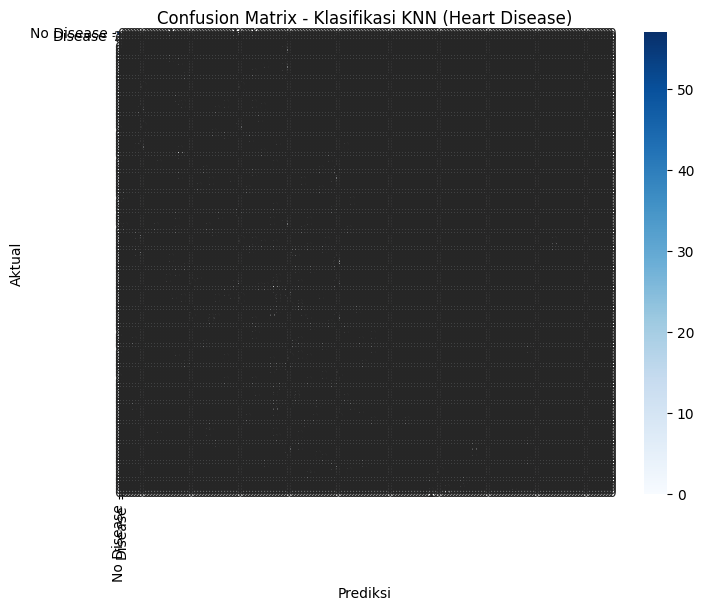

In [13]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
cm_heart = confusion_matrix(y_test_heart, y_pred_heart)
sns.heatmap(cm_heart, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Klasifikasi KNN (Heart Disease)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


### **KNN REGRESI PADA DATASET UJIAN**

In [26]:
# Import library yang dibutuhkan
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [14]:
excercises_df = pd.read_csv('R03_excercises.csv', delimiter= ",")
excercises_df

,Daily Exercise Time (X),Weight Loss (Y)
0,0.5,0.2
1,1.0,0.4
2,1.5,0.7
3,2.0,1.0
4,1.0,0.3
...,...,...
69,3.6,1.8
70,1.8,0.7
71,1.9,0.8
72,3.4,1.7


Mendefinisikan Fitur dan Target

In [15]:
X_excercises = excercises_df[['Daily Exercise Time (X)']]
y_excercises = excercises_df['Weight Loss (Y)']

Membagi data Training dan Uji

In [17]:
X_train_excercises, X_test_excercises, y_train_excercises, y_test_excercises = train_test_split(
    X_excercises, y_excercises, test_size=0.3, random_state=42
)

### Standarisasi Fitur

In [18]:
scaler_excercises = StandardScaler()
X_train_excercises = scaler_excercises.fit_transform(X_train_excercises)
X_test_excercises = scaler_excercises.transform(X_test_excercises)

## Training Model KNN untuk Regresi



In [23]:
knn_regressor_excercises = KNeighborsRegressor(n_neighbors=5)
knn_regressor_excercises.fit(X_train_excercises, y_train_excercises)

KNeighborsRegressor()

Prediksi dan Evaluasi Model

In [27]:
# Prediksi dan evaluasi model
y_pred_excercises = knn_regressor_excercises.predict(X_test_excercises)
regression_mse_excercises = mean_squared_error(y_test_excercises, y_pred_excercises)
print("Mean Squared Error KNN Regresi (Excercises):", regression_mse_excercises)

Mean Squared Error KNN Regresi (Excercises): 0.007704347826086952


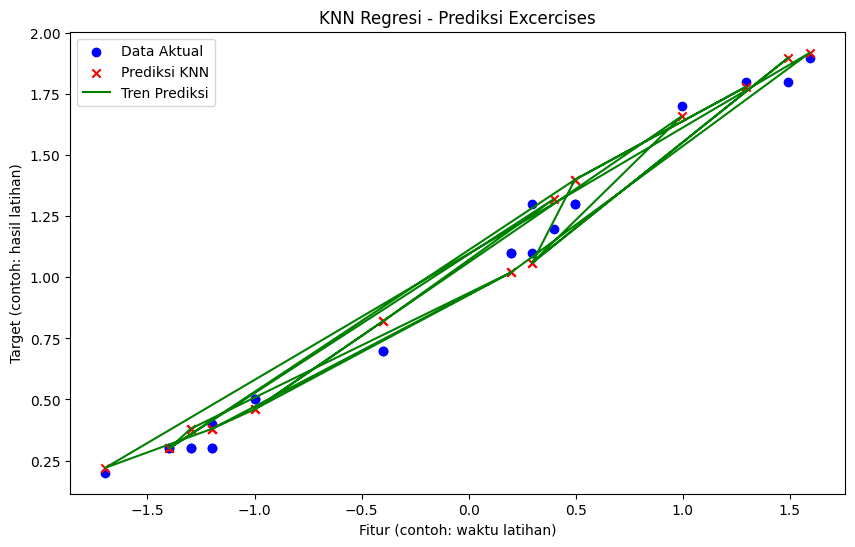

In [29]:
# Visualisasi Hasil Regresi
plt.figure(figsize=(10, 6))
plt.scatter(X_test_excercises, y_test_excercises, color="blue", label="Data Aktual")
plt.scatter(X_test_excercises, y_pred_excercises, color="red", marker="x", label="Prediksi KNN")
plt.plot(X_test_excercises, y_pred_excercises, color="green", label="Tren Prediksi")
plt.title("KNN Regresi - Prediksi Excercises")
plt.xlabel("Fitur (contoh: waktu latihan)")
plt.ylabel("Target (contoh: hasil latihan)")
plt.legend()
plt.show()